# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
ruta_base = "/datasets/"
archivos = {
    "orders": "instacart_orders.csv",
    "products": "products.csv",
    "aisles": "aisles.csv",
    "departments": "departments.csv",
    "order_products": "order_products.csv"
}
df_orders = pd.read_csv(ruta_base + archivos["orders"], sep=";")
df_products = pd.read_csv(ruta_base + archivos["products"], sep=";")
df_aisles = pd.read_csv(ruta_base + archivos["aisles"], sep=";")
df_departments = pd.read_csv(ruta_base + archivos["departments"], sep=";")
df_order_products = pd.read_csv(ruta_base + archivos["order_products"], sep=";")

In [3]:
# mostrar información del DataFrame
print(df_orders.head())
print(df_orders.info(show_counts = True))

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [4]:
# mostrar información del DataFrame
print(df_products.head())
print(df_products.info(show_counts = True))

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
N

In [5]:
# mostrar información del DataFrame
print(df_aisles.head())
print(df_aisles.info(show_counts = True))

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
# mostrar información del DataFrame
print(df_departments.head())
print(df_departments.info())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
# mostrar información del DataFrame
print(df_order_products.head())
print(df_order_products.info(show_counts = True))

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Los datos se encuentras separados por por un divisor no estandad, una ";" en lugar de ",". Tambien se identificaron valores ausentes, ademas algunos datos estan como datos flotantes, cuando no tiene sentido que lo sean, como days_since_prior_order o add_to_cart_order

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

In [8]:
print(df_orders[df_orders.isna().any(axis=1)])
print(df_orders["days_since_prior_order"].isna().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [9]:
print(df_products[df_products.isna().any(axis=1)])
print(df_products["product_name"].isna().sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
1258


In [10]:
print(df_products["product_id"].duplicated().sum())

0


In [12]:
#eliminacion de datos ausentes df_products 
#creo que no deberia eliminar los datos ausentes dado que aunque falta el nombre cuentan con Id unico


In [11]:
#cambio a minusculas product_name
df_products["product_name"]= df_products["product_name"].str.lower()
print(df_products.head())

   product_id                                       product_name  aisle_id  \
0           1                         chocolate sandwich cookies        61   
1           2                                   all-seasons salt       104   
2           3               robust golden unsweetened oolong tea        94   
3           4  smart ones classic favorites mini rigatoni wit...        38   
4           5                          green chile anytime sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [12]:
print(df_order_products[df_order_products.isna().any(axis=1)])


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [13]:
print(df_order_products["add_to_cart_order"].isna().sum())

836


In [16]:
#cambio de numero flotante a entero


## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [14]:
# Revisa si hay pedidos duplicados
print(df_orders.duplicated().sum())


15


In [15]:
print(df_orders[df_orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? si, en la seccion de orders, que todas fueron a las 2:00 

In [16]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles= df_orders[df_orders["order_dow"]==3]
pedidos_2_am= pedidos_miercoles[pedidos_miercoles["order_hour_of_day"]==2]
print(pedidos_2_am)
#como se cuales fueron el miercoles?


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? Hay 15 pedidos que se duplicaron, cada una posiblemete 8 veces

In [17]:
# Elimina los pedidos duplicados
df_orders= df_orders.drop_duplicates().reset_index(drop=True)

In [18]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())

0


In [19]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders["order_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos
Se eliminaron los pedidos duplicados 

### `products` data frame

In [20]:
print(df_products.duplicated().sum())


0


In [21]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products["product_id"].duplicated().sum())

0


In [22]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(df_products["product_name"].duplicated().sum())

1361


In [23]:
# Revisa si hay nombres duplicados de productos no faltantes
df_productos_faltantes = df_products.drop_duplicates(subset=["product_name"])
print("duplicados de productos no faltantes", df_productos_faltantes["product_name"].duplicated().sum())


duplicados de productos no faltantes 0


Describe brevemente tus hallazgos y lo que hiciste con ellos. 
Los valores duplicados se conforman principalmente por los valores ausentes de product_name, dado que todos dicen NaN

### `departments` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())


0


In [25]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments.duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos. 
No hay valores duplicados

### `aisles` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [27]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_aisles["aisle_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No hay valores duplicados, por lo que no fue necesario hacer nada con ellos

### `order_products` data frame

In [28]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())


0


In [29]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products["product_id"].duplicated().sum())

4499434


Describe brevemente tus hallazgos y lo que hiciste con ellos. Aunque hay Id de productos duplicados, eso no indica que haya productos duplicados, porque muchos productos se habran comprado varias veces en distintas ordenes, por lo que es normal que aparezcan varias veces

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [30]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products["product_name"].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.
Hay valores ausentes en product name

In [31]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
pasillo_100 = df_products[df_products["aisle_id"]==100]

print("Valores ausentes relacionados al pasillo con ID 100: ",pasillo_100["product_name"].isna().sum())
print("Total de valores ausentes: ", df_products["product_name"].isna().sum())


Valores ausentes relacionados al pasillo con ID 100:  1258
Total de valores ausentes:  1258


Describe brevemente cuáles son tus hallazgos. 
Todos los valores ausentes estan relacionados al pasillo 100

In [32]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
departamento_21 = df_products[df_products["department_id"]==21]

print("Valores ausentes relacionados al deartamento con ID 21: ",departamento_21["product_name"].isna().sum())
print("Total de valores ausentes: ", df_products["product_name"].isna().sum())



Valores ausentes relacionados al deartamento con ID 21:  1258
Total de valores ausentes:  1258


Describe brevemente cuáles son tus hallazgos.
Todos los valores ausentes estan relacionados al departamento 21

In [33]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
departamento_21_pasillo_100= departamento_21[departamento_21["aisle_id"]==100]
print(departamento_21_pasillo_100.head(10))
print(departamento_21_pasillo_100.count())

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21
439         440          NaN       100             21
471         472          NaN       100             21
490         491          NaN       100             21
555         556          NaN       100             21
product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64


Describe brevemente cuáles son tus hallazgos.
todos los valores de product_name en el pasillo 100 del departamento 21 se encuentra ausente, es probable que se produciera un error al momento de registrar los nombres de los productos de ese pasillo


In [34]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products["product_name"]= df_products["product_name"].fillna("Unknown")
print(df_products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Si bien se desconose el nombre de los productos del pasillo 100, son productos reales, es posible que fueran productos nuevos, o que el pasillo fuera nuevo y aun no se registrara su contenido, pero los productos son reales, por lo que se cambio el nombre como Unknown o desconocido 

### `orders` data frame

In [35]:
# Encuentra los valores ausentes
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [36]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_orders[df_orders.isna().any(axis=1)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [37]:
#sustitucion de valores ausentes en df_orders
df_orders["days_since_prior_order"]= df_orders["days_since_prior_order"].fillna(0).astype("int64")
print(df_orders.isna().sum())
print(df_orders.info())


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 21.9 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los valores ausentes estaban en days_since_prior_order, aparentemente los valores ausentes consisten en la primera compra, estos valores se sustituyeron con 0 para poder tratarlos como numeros enteros

### `order_products` data frame

In [40]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [41]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Valor minimo: ", df_order_products["add_to_cart_order"].min())
print("Valor maximo: ", df_order_products["add_to_cart_order"].max())

Valor minimo:  1.0
Valor maximo:  64.0


Describe brevemente cuáles son tus hallazgos.

In [42]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_de_valores_ausentes = df_order_products[df_order_products["add_to_cart_order"].isna()]['order_id'].tolist()
print(id_de_valores_ausentes)

[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844733, 2136777, 813364, 165801, 2256933, 171934, 264710, 2449164, 2409109, 3347453, 813364, 2926893, 936852, 1730767, 1169835, 733526, 844733, 293169, 61355, 903110, 1968313, 733526, 2136777, 2926893, 404157, 1386261, 171934, 3125735, 747668, 3308010, 1169835, 1800005, 1961723, 936852, 2849370, 3308010, 61355, 871281, 1717990, 813364, 388234, 61355, 3125735, 1959075, 61355, 3125735, 1648217, 171934, 3125735, 61355, 1477139, 1959075, 1717990, 1717990, 61355, 1717990, 171934, 1038146, 3308010, 3347453, 102236, 936852, 171934, 1730767, 2926893, 1021563, 1832957, 1959075, 2256933, 1968313, 2721963, 293169, 102236, 3125735, 1959075, 264710, 678116, 1220886, 1386261, 171934, 1959075, 61355, 3308010, 61355, 102236, 388234, 171934, 3308010, 19617

In [48]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
valores_ausentes= df_order_products[df_order_products['add_to_cart_order'].isna()]
valores_ausentes_por_pedido= valores_ausentes.groupby(by= "order_id")["product_id"].count().reset_index()
valores_ausentes_por_pedido.rename(columns={'product_id': 'num_products'}, inplace=True)
print("Valor minimo de 'product_id': ", valores_ausentes_por_pedido.min())
print("Valor maximo de 'product_id': ", valores_ausentes_por_pedido.max())
print(valores_ausentes_por_pedido.head())
print(valores_ausentes)

Valor minimo de 'product_id':  order_id        9310
num_products       1
dtype: int64
Valor maximo de 'product_id':  order_id        3383594
num_products         63
dtype: int64
   order_id  num_products
0      9310             1
1     61355            63
2    102236            31
3    129627             5
4    165801             6
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
453573

Describe brevemente cuáles son tus hallazgos.
tienen menos de 64 productos (me sigue dando lo mismo, o no estoy seguro si algo este haciendo mal

In [44]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products["add_to_cart_order"]= df_order_products["add_to_cart_order"].fillna(999)
print(df_order_products.isna().sum())


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [45]:
df_order_products["add_to_cart_order"]=df_order_products["add_to_cart_order"].astype("int64")
print(df_order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Porque el maximo de add_to_cart_order?, es posible que la pagina solo pueda procesar un maximo de productos añadidos

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Las bases de datos contaban con varios datos ausentes y dulicados, algunos de ellos pobrablemente se deban a errores momentaneos en el sistea, dado que algunos de ellos ocurrieron a la misma fecha y hora, mientras que otras podrian deberse errores en los registros o por ser datos nuevos aun no registrados


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

In [46]:
#no entiendo porque no se muestra ningun resultado, ni siquiera se si lo estoy haciendo bien

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [47]:
print("El valor minimo de order_hour_of_day es: ", df_orders['order_hour_of_day'].min(), "y el valor maximo es ", df_orders['order_hour_of_day'].max())
print("Valores unicos de order_hour_of_day es: ", df_orders['order_hour_of_day'].unique())
print("El valor minimo de order_dow es: ", df_orders['order_dow'].min(), "y el valor maximo es ", df_orders['order_dow'].max())
print("Valores unicos de order_dow es: ", df_orders['order_dow'].unique())

El valor minimo de order_hour_of_day es:  0 y el valor maximo es  23
Valores unicos de order_hour_of_day es:  [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
El valor minimo de order_dow es:  0 y el valor maximo es  6
Valores unicos de order_dow es:  [6 5 0 4 3 1 2]


Escribe aquí tus conclusiones
la hora minima y maxima en la que se pidieron ordener fueron las 0 y 23 horas respectivamente, y los valores unicos presentaron todas las horas entre ese intervalo
mientras que el valor minimo y maximo de los dias en que se pidieron ordenes son 0 y 6

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

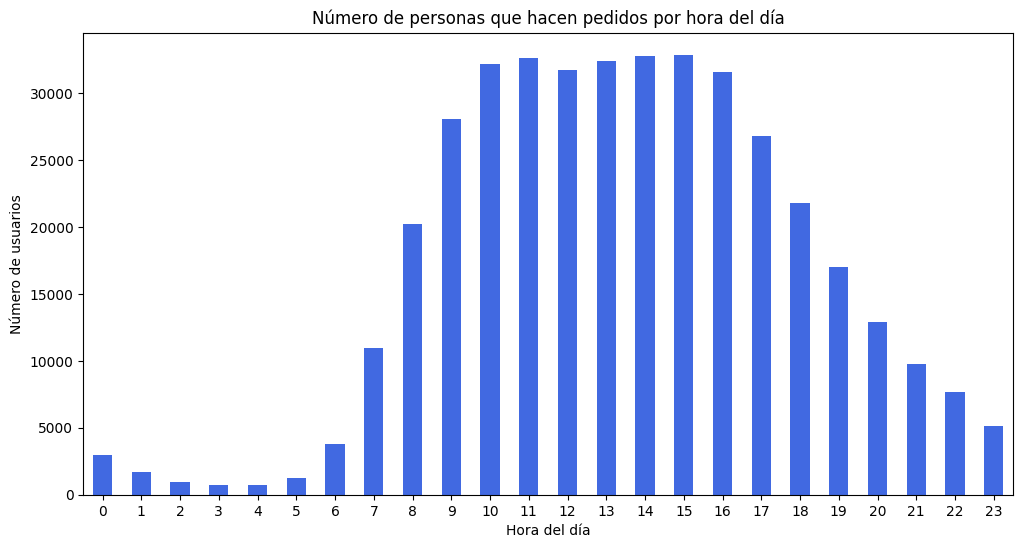

In [48]:
hora_de_ordenes = df_orders.groupby('order_hour_of_day')['user_id'].nunique()
hora_de_ordenes.plot.bar(figsize=(12, 6), color='royalblue', xlabel='Hora del día', ylabel='Número de usuarios', title='Número de personas que hacen pedidos por hora del día', rot=0)

plt.show()

Escribe aquí tus conclusiones
el numero de pedidos alcanza sus puntos mas altos entre las 10:00 am y 4:00 m, despues de las 5:00 pm el numero de pedidos comienza a descender hasta alcanzar su punto mas bajo a las 3:00 am, comenzando a crecer de nuevo el numero de pedidos a partir de las 5:00 am

### [A3] ¿Qué día de la semana compran víveres las personas?

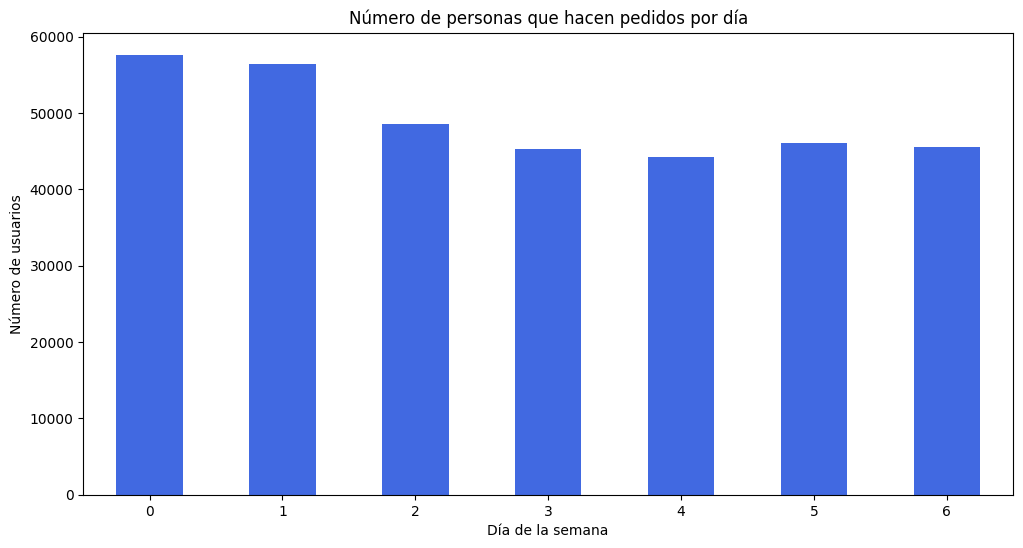

In [49]:
dia_de_ordenes = df_orders.groupby('order_dow')['user_id'].nunique()
dia_de_ordenes.plot.bar(figsize=(12, 6), color='royalblue', xlabel='Día de la semana', ylabel='Número de usuarios', title='Número de personas que hacen pedidos por día', rot=0)
plt.show()

Escribe aquí tus conclusiones
El dia de la semana no tiene un gran impacto en el numero de pedidos, sin emabargo, si se presenta un ligero incremento en el numero de pedidos los dias domingo y lunes

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

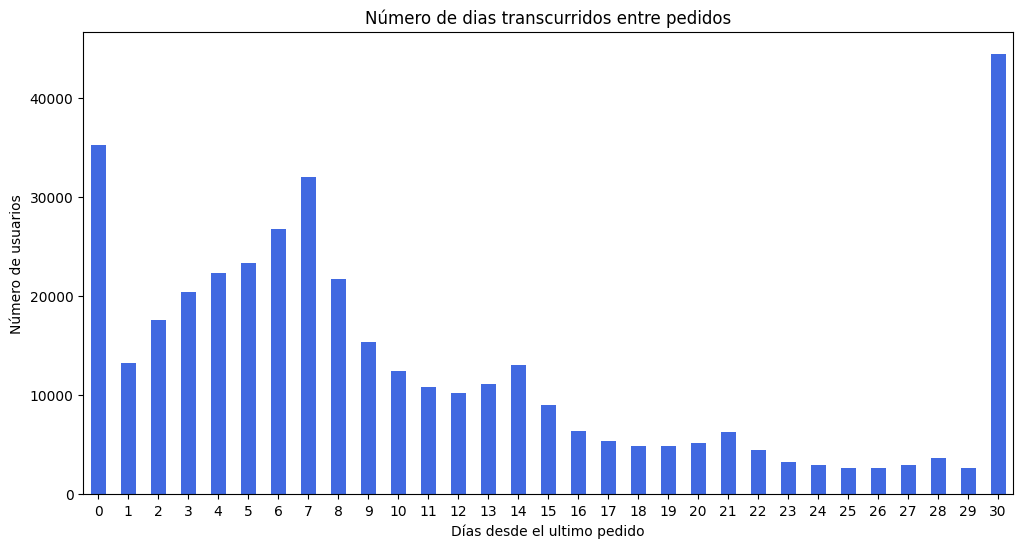

In [50]:
dias_de_espera_para_proxima_orden = df_orders.groupby('days_since_prior_order')['user_id'].nunique()
dias_de_espera_para_proxima_orden.plot.bar(figsize=(12, 6), color='royalblue', xlabel='Días desde el ultimo pedido', ylabel='Número de usuarios', title='Número de dias transcurridos entre pedidos', rot=0)

plt.show()


In [51]:
print("Valor minimo", df_orders['days_since_prior_order'].min())
print("Valor maximo", df_orders['days_since_prior_order'].max())

Valor minimo 0
Valor maximo 30


Escribe aquí tus conclusiones
La mayoria de las personas realizan sus proximos pedidos transcurridos los 30 dias del pedido anterior, seguido del dia 0, que no estoy seguro si representa el primer pedido o diferentes pedidos realizados el mismo dia, mientras que la menor cantidad de personas dejaba transcurrir etre 25 y 29 dias entre sus pedidos

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [53]:
miercoles= df_orders[df_orders['order_dow']==3]
sabado= df_orders[df_orders['order_dow']==6]

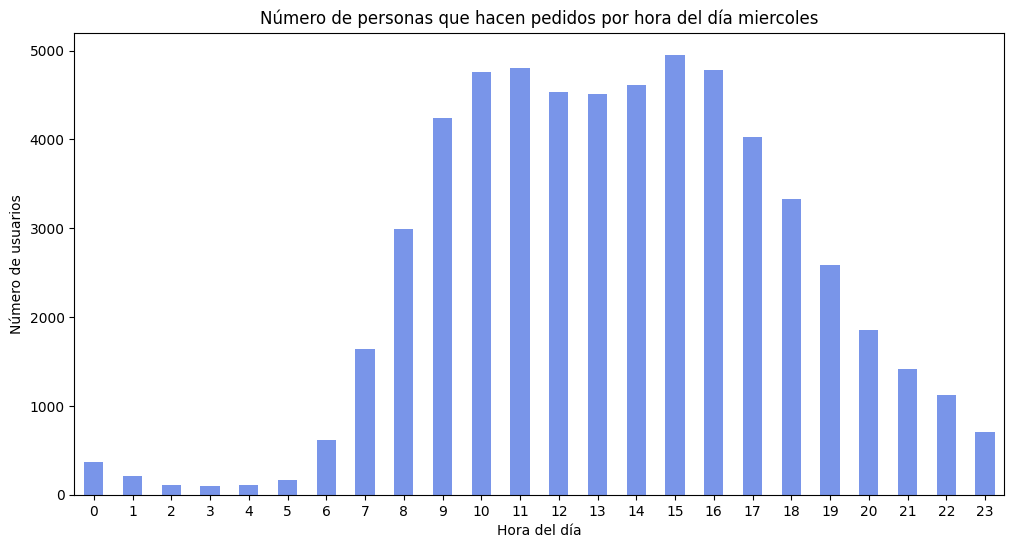

In [54]:
hora_de_ordenes_miercroles = miercoles.groupby('order_hour_of_day')['user_id'].nunique()
hora_de_ordenes_miercroles.plot.bar(figsize=(12, 6), color='royalblue', xlabel='Hora del día', ylabel='Número de usuarios', title='Número de personas que hacen pedidos por hora del día miercoles', rot=0, alpha=0.7, align='center')
plt.show()

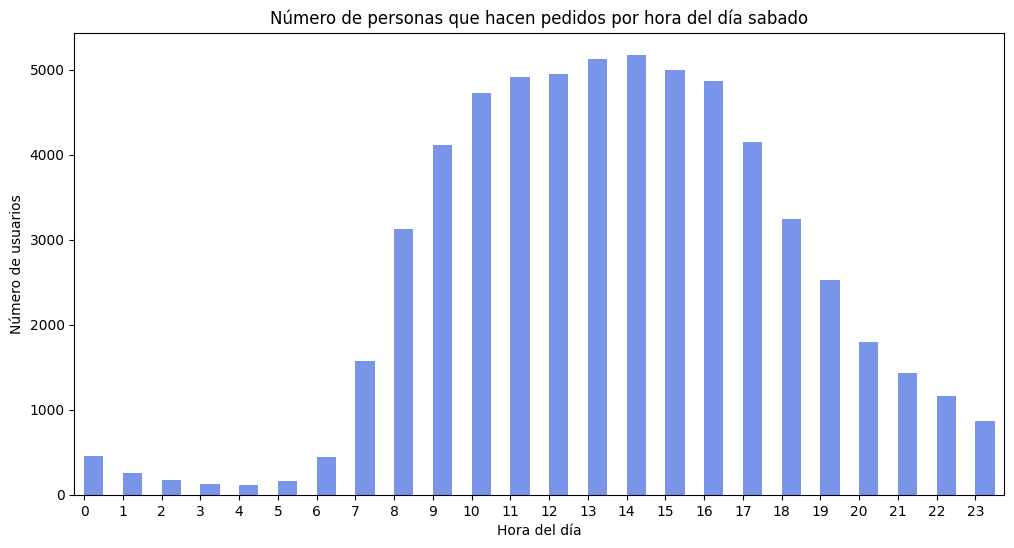

In [55]:
hora_de_ordenes_sabado = sabado.groupby('order_hour_of_day')['user_id'].nunique()
hora_de_ordenes_sabado.plot.bar(figsize=(12, 6), color='royalblue', xlabel='Hora del día', ylabel='Número de usuarios', title='Número de personas que hacen pedidos por hora del día sabado', rot=0, alpha=0.7, align='edge')
plt.show()

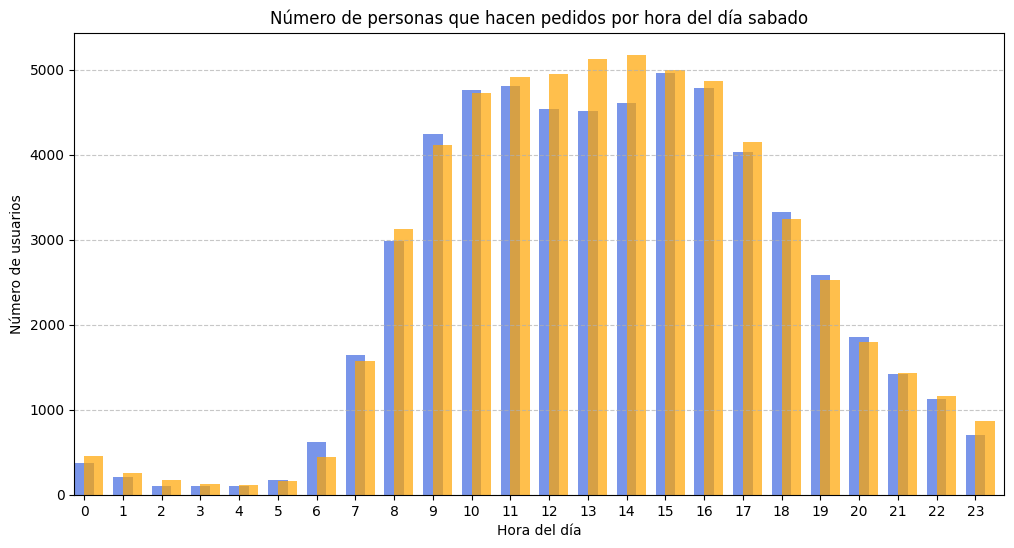

In [60]:
hora_de_ordenes_miercroles = miercoles.groupby('order_hour_of_day')['user_id'].nunique()
hora_de_ordenes_miercroles.plot.bar(figsize=(12, 6), color='royalblue', xlabel='Hora del día', ylabel='Número de usuarios', title='Número de personas que hacen pedidos por hora del día miercoles', rot=0, alpha=0.7, align='center')
hora_de_ordenes_sabado = sabado.groupby('order_hour_of_day')['user_id'].nunique()
hora_de_ordenes_sabado.plot.bar(figsize=(12, 6), color='orange', xlabel='Hora del día', ylabel='Número de usuarios', title='Número de personas que hacen pedidos por hora del día sabado', rot=0, alpha=0.7, align='edge')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones
Presentan una tendencia bastante similar, sin embargo, presentan picos de pedidos ligeramente diferentes, el dia miercoles presenta dos picos de ventas, entre 10:00 y 11:00 am y entre 3:00 y 4:00 pm, mientras que el sabado se presenta un pico de ventas entre 1:00 y 2:00 pm

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

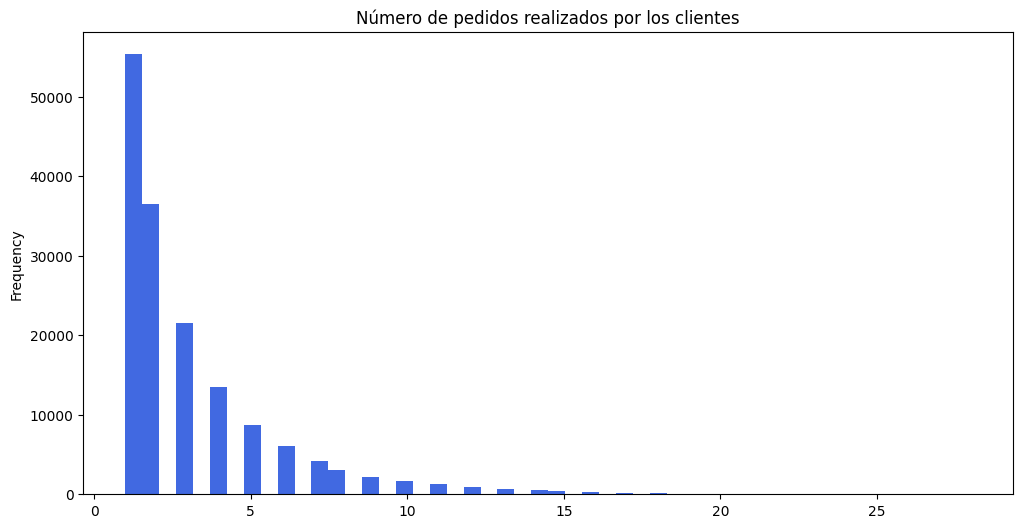

In [55]:
numero_de_pedidos_por_cliente = df_orders.groupby('user_id')['order_number'].nunique()
numero_de_pedidos_por_cliente.plot.hist(figsize=(12, 6), color='royalblue', xlabel='numero de pedidos', ylabel='Número de usuarios', title='Número de pedidos realizados por los clientes', rot=0, bins=50)
plt.show()

In [56]:
print(df_orders['order_number'].max())

100


Escribe aquí tus conclusiones
La mayoria de usuarios realizaron entre 1 y 5 pedidos 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [61]:
top20_products = df_order_products['product_id'].value_counts().reset_index()
top20_products.columns = ['product_id', 'order_count']


In [64]:
top20_products = top20_products.merge(df_products[['product_id', 'product_name']], on='product_id')

top20_products = top20_products.head(20)

print(top20_products)


    product_id  order_count            product_name_x  \
0        24852        66050                    banana   
1        13176        53297    bag of organic bananas   
2        21137        37039      organic strawberries   
3        21903        33971      organic baby spinach   
4        47209        29773      organic hass avocado   
5        47766        24689           organic avocado   
6        47626        21495               large lemon   
7        16797        20018              strawberries   
8        26209        19690                     limes   
9        27845        19600        organic whole milk   
10       27966        19197       organic raspberries   
11       22935        15898      organic yellow onion   
12       24964        15292            organic garlic   
13       45007        14584          organic zucchini   
14       39275        13879       organic blueberries   
15       49683        13675            cucumber kirby   
16       28204        12544    

<AxesSubplot:title={'center':'Top 20 productos mas populares'}, xlabel='Productos', ylabel='Numero de compras'>

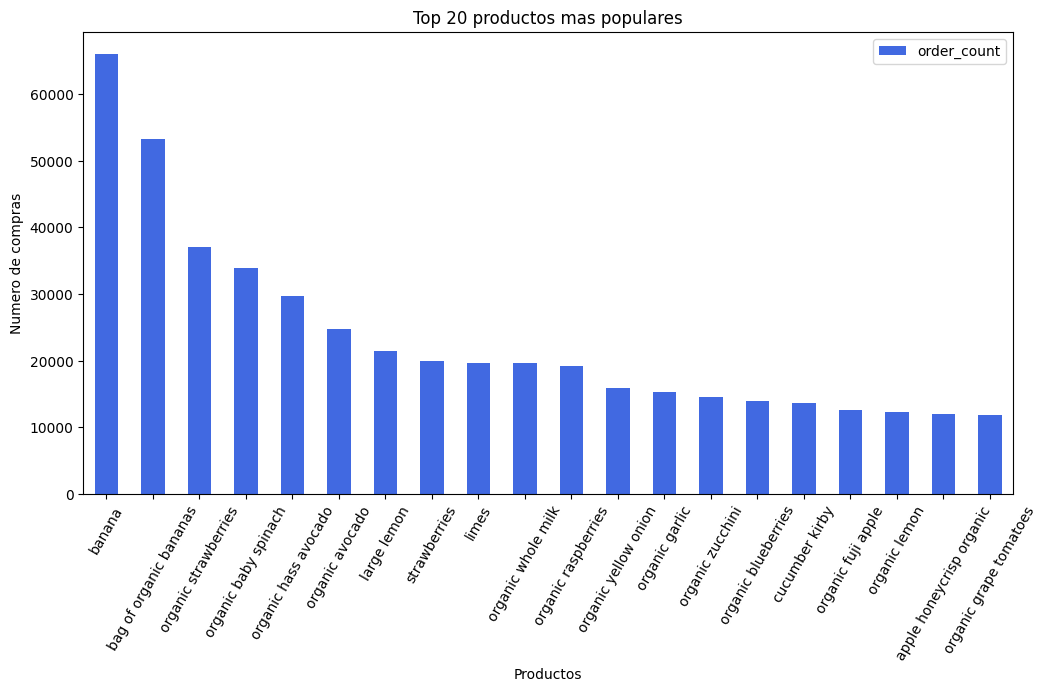

In [66]:
top20_products.plot.bar(figsize=(12, 6), x= "product_name",y="order_count" ,color='royalblue', xlabel='Productos', ylabel='Numero de compras', title='Top 20 productos mas populares', rot=60)

Escribe aquí tus conclusiones
los productos mas comprados son las bananas y bananas organicas

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [68]:
numero_de_productos_por_pedido = df_order_products.groupby(by='order_id').size()

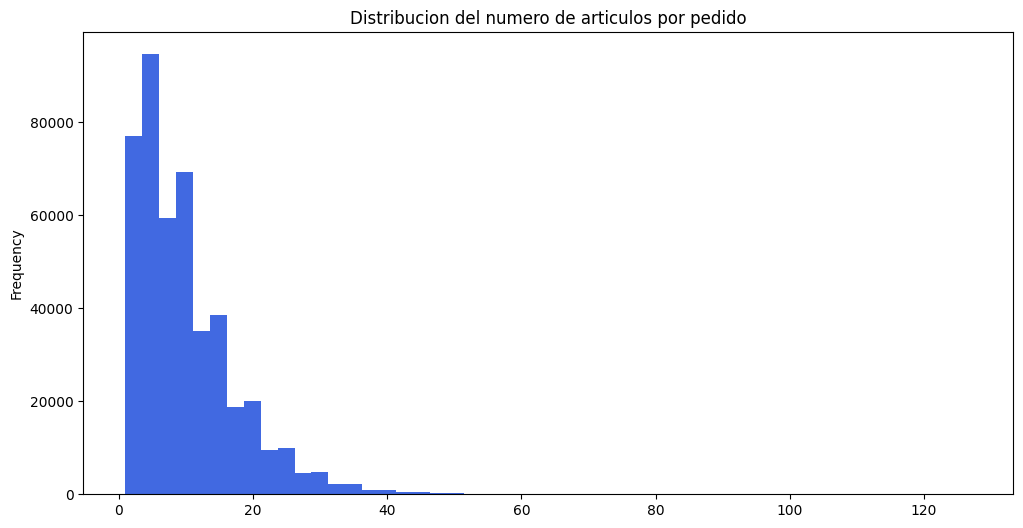

In [69]:
numero_de_productos_por_pedido.plot.hist(figsize=(12, 6), color="royalblue", xlabel='numero de articulos por pedidos', ylabel='Frecuencia', title='Distribucion del numero de articulos por pedido', rot=0, bins=50)
plt.show()

In [70]:
numero_de_productos_por_pedido_top30 =numero_de_productos_por_pedido.head(30)

<AxesSubplot:title={'center':'Distribucion del numero de articulos por pedido'}, ylabel='Frequency'>

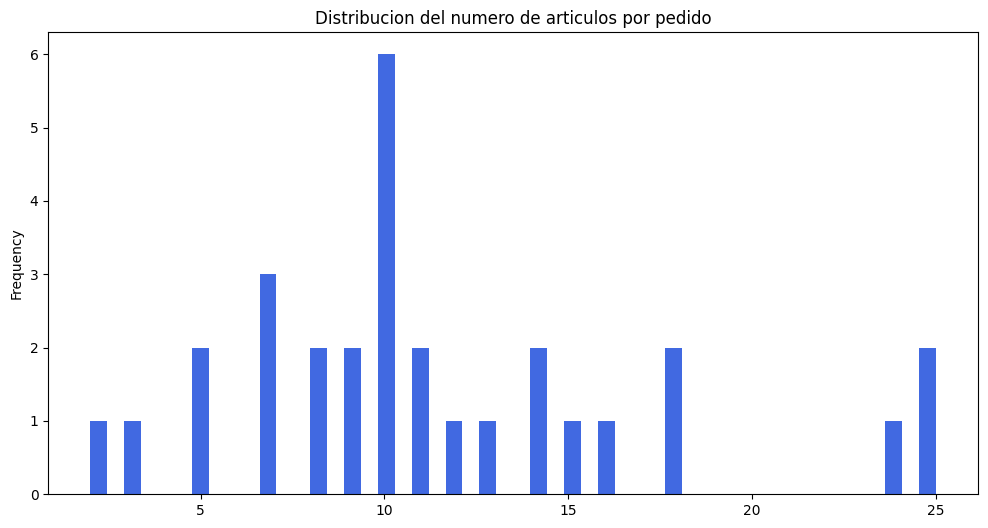

In [71]:
numero_de_productos_por_pedido_top30.plot.hist(figsize=(12, 6), color="royalblue", xlabel='numero de articulos por pedidos', ylabel='Frecuencia', title='Distribucion del numero de articulos por pedido', rot=0, bins=50)

Escribe aquí tus conclusiones
La cantidad de productos comprados mas popular son 10 productos, seguido de 6

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [73]:
reordered_products = df_order_products[df_order_products['reordered'] == 1]

In [74]:
top_reordered = reordered_products['product_id'].value_counts().reset_index()
top_reordered.columns = ['product_id', 'reorder_count']


In [75]:
top_reordered = top_reordered.merge(df_products[['product_id', 'product_name']], on='product_id')

In [76]:
top_reordered = top_reordered.head(20)
print(top_reordered)

    product_id  reorder_count              product_name
0        24852          55763                    banana
1        13176          44450    bag of organic bananas
2        21137          28639      organic strawberries
3        21903          26233      organic baby spinach
4        47209          23629      organic hass avocado
5        47766          18743           organic avocado
6        27845          16251        organic whole milk
7        47626          15044               large lemon
8        27966          14748       organic raspberries
9        16797          13945              strawberries
10       26209          13327                     limes
11       22935          11145      organic yellow onion
12       24964          10411            organic garlic
13       45007          10076          organic zucchini
14       49683           9538            cucumber kirby
15       28204           8989        organic fuji apple
16        8277           8836  apple honeycrisp 

<AxesSubplot:title={'center':'Top 20 productos mas recomprados'}, xlabel='Productos', ylabel='Numero de compras'>

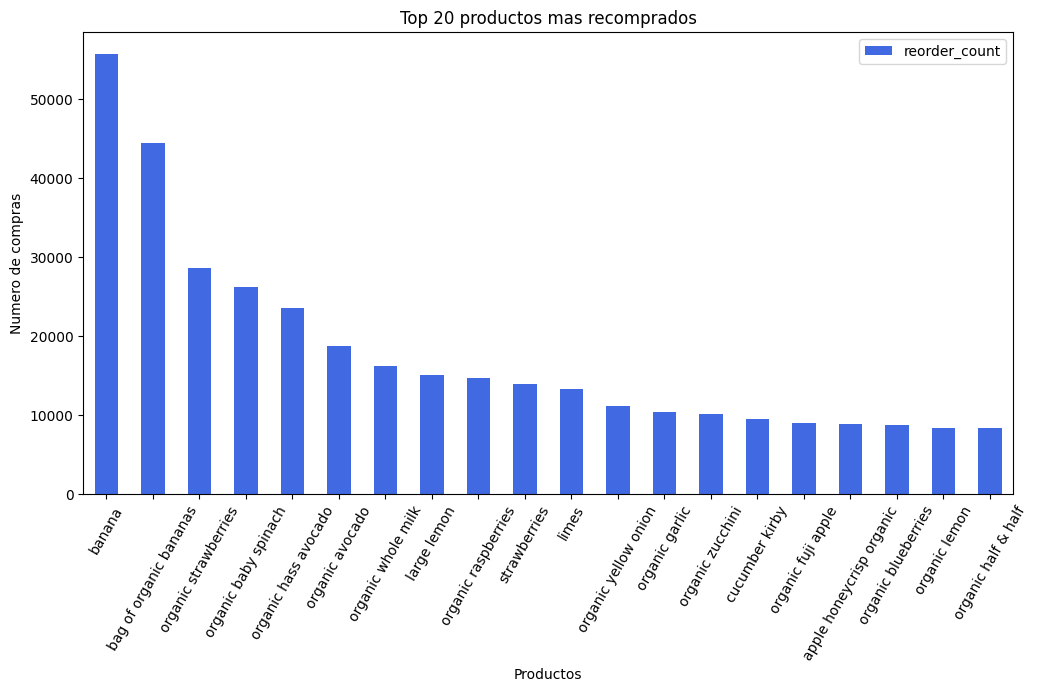

In [78]:
top_reordered.plot.bar(figsize=(12, 6), x= "product_name",y="reorder_count" ,color='royalblue', xlabel='Productos', ylabel='Numero de compras', title='Top 20 productos mas recomprados', rot=60)

Escribe aquí tus conclusiones
al igual que en el top 20 de los productos pas ordenados, los productos mas reordenados son las bananas y bananas organicas, la mayoria de los pedidos que son reordenados son alimentos organicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [76]:
total_orders = df_order_products['product_id'].value_counts().reset_index()
total_orders.columns = ['product_id', 'total_orders']



In [78]:
# Contar cuántas veces se ha reordenado cada producto (reordered == 1)
reorders = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts().reset_index()
reorders.columns = ['product_id', 'reorder_count']

# Unir ambas tablas para tener total de pedidos y reordenamientos
product_reorder_ratio = total_orders.merge(reorders, on='product_id', how='left')

# Reemplazar valores NaN en reorder_count (productos que nunca fueron reordenados)
product_reorder_ratio['reorder_count'] = product_reorder_ratio['reorder_count'].fillna(0)

# Calcular la proporción de reordenamiento
product_reorder_ratio['reorder_ratio'] = product_reorder_ratio['reorder_count'] / product_reorder_ratio['total_orders']

# Unir con el DataFrame de productos para obtener los nombres
product_reorder_ratio = product_reorder_ratio.merge(df_products[['product_id', 'product_name']], on='product_id')


In [79]:
print(product_reorder_ratio.head(20))

    product_id  total_orders  reorder_count  reorder_ratio  \
0        24852         66050        55763.0       0.844254   
1        13176         53297        44450.0       0.834006   
2        21137         37039        28639.0       0.773212   
3        21903         33971        26233.0       0.772217   
4        47209         29773        23629.0       0.793639   
5        47766         24689        18743.0       0.759164   
6        47626         21495        15044.0       0.699884   
7        16797         20018        13945.0       0.696623   
8        26209         19690        13327.0       0.676841   
9        27845         19600        16251.0       0.829133   
10       27966         19197        14748.0       0.768245   
11       22935         15898        11145.0       0.701032   
12       24964         15292        10411.0       0.680813   
13       45007         14584        10076.0       0.690894   
14       39275         13879         8799.0       0.633979   
15      

Escribe aquí tus conclusiones 
los articulos del top 20 tienen un alto indice de repedido, que va desde el 66% al 84%, por lo que los usuarios que los compran son clientes leales

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [79]:
# Unir orders con order_products para asociar cada producto con un usuario
orders_merged = df_order_products.merge(df_orders[['order_id', 'user_id']], on='order_id')

# Contar cuántos productos ha pedido cada usuario en total
total_products_per_user = orders_merged.groupby('user_id').size().reset_index(name='total_orders')

# Contar cuántos productos han sido reordenados (reordered == 1) por cada usuario
reordered_products_per_user = orders_merged[orders_merged['reordered'] == 1].groupby('user_id').size().reset_index(name='reordered_orders')

# Unir ambas tablas
user_reorder_ratio = total_products_per_user.merge(reordered_products_per_user, on='user_id', how='left')

# Reemplazar valores NaN en reorder_count (usuarios que nunca han reordenado)
user_reorder_ratio['reordered_orders'] = user_reorder_ratio['reordered_orders'].fillna(0)

# Calcular la proporción de productos reordenados por usuario
user_reorder_ratio['reorder_ratio'] = user_reorder_ratio['reordered_orders'] / user_reorder_ratio['total_orders']

# Mostrar los primeros registros


In [80]:
print(user_reorder_ratio.head(20))

    user_id  total_orders  reordered_orders  reorder_ratio
0         2            26               1.0       0.038462
1         4             2               0.0       0.000000
2         5            12               8.0       0.666667
3         6             4               0.0       0.000000
4         7            14              13.0       0.928571
5        11            15               3.0       0.200000
6        12            12               3.0       0.250000
7        13            23              13.0       0.565217
8        14            61              22.0       0.360656
9        15            13               7.0       0.538462
10       16            32              17.0       0.531250
11       17            53              38.0       0.716981
12       19            48              14.0       0.291667
13       20             4               0.0       0.000000
14       21            20               8.0       0.400000
15       22             6               6.0       1.0000

In [82]:
print("Porcentaje promedio de la proporcion de productos reordenados", user_reorder_ratio["reorder_ratio"].mean())
print("Numero promedio de productos reordenados", user_reorder_ratio["reordered_orders"].mean())

Porcentaje promedio de la proporcion de productos reordenados 0.4948531736151642
Numero promedio de productos reordenados 17.93697619397698


Escribe aquí tus conclusiones 
En romedio, los usuarios reordenaron 49% de los productos que ordenaron con anterioridad

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [83]:
# Filtrar solo los productos que fueron añadidos primero en el carrito
first_added = df_order_products[df_order_products['add_to_cart_order'] == 1]

# Contar cuántas veces cada producto ha sido el primero en un carrito
top_first_added = first_added['product_id'].value_counts().reset_index()
top_first_added.columns = ['product_id', 'first_added_count']

In [84]:
# Unir con el dataframe de productos para obtener los nombres
top_first_added = top_first_added.merge(df_products[['product_id', 'product_name']], on='product_id')

# Seleccionar los 20 productos más frecuentes
top_first_added = top_first_added.head(20)


In [85]:
print(top_first_added)


    product_id  first_added_count                 product_name
0        24852              15562                       banana
1        13176              11026       bag of organic bananas
2        27845               4363           organic whole milk
3        21137               3946         organic strawberries
4        47209               3390         organic hass avocado
5        21903               3336         organic baby spinach
6        47766               3044              organic avocado
7        19660               2336                 spring water
8        16797               2308                 strawberries
9        27966               2024          organic raspberries
10       44632               1914   sparkling water grapefruit
11       49235               1797          organic half & half
12       47626               1737                  large lemon
13         196               1733                         soda
14       38689               1397     organic reduced f

<AxesSubplot:title={'center':'Top 20 productos añadidos primero'}, xlabel='Productos', ylabel='Numero de veces que fueron añadidos primero'>

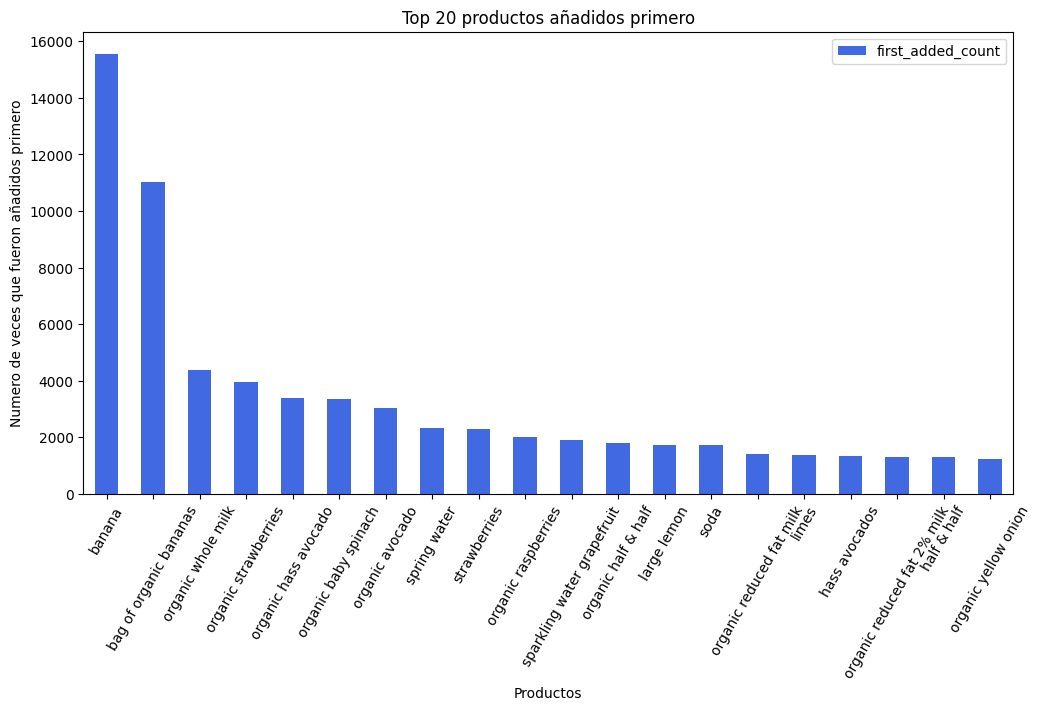

In [87]:
top_first_added.plot.bar(figsize=(12, 6), x= "product_name",y="first_added_count" ,color='royalblue', xlabel='Productos', ylabel='Numero de veces que fueron añadidos primero', title='Top 20 productos añadidos primero', rot=60)

Escribe aquí tus conclusiones
La lista sigue siendo muy similar al top 20 de articulos ordenados y articulos reordenados

### Conclusion general del proyecto:

Los usuarios presentan una clara preferencia por los articulos organicos, dado a la alta tasa de reordenado de los productos, es probable que se encuentren sastisfechos con la calidade de los productos. Asi mismo se a observado un ligero incremento en los pedidos los dias sabados y lunes, con los horarios de mayor numero de pedidos entre las 10:00 am y 3:00 pm. La mayoria de los usuarios compran entre 1 a 10 articulos por pedido, con un pico en el rango de 3 a 5 articulos por pedido. Un gran numero de usurarios realiza un nuevo pedido transcurridos los 30 dias desde el pedido anterior, sin embargo, otra gran cantidad de usuarios los realiza transcurridos 0 dias desde el pedido anterior o 7 dias, posiblemente esto se deba a que son compras semanales como parte de su mandado